# **PCA Feature Engineering (Dimensionality Reduction)**
---

**This notebook demonstrates the feature engineering using Principal Component Analysis for dimensionality reduction of features having least importance in model prediction for Breast Cancer Prediction.** 

In [40]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import sys
sys.path.insert(0, '../')
from models.pca import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

In [41]:
# loading the data

data_dir = r"D:\Pragyan\Machine Learning Cancer prediction\breast-cancer-prediction\data\interim"

def load_data(filename):
    filepath = os.path.join(data_dir, filename)
    with open(filepath, 'rb') as f:
        return pickle.load(f)

x_train,y_train = load_data('training.pkl')
x_test,y_test = load_data('testing.pkl')
x_train_least,x_test_least = load_data('least_imp_features.pkl')

## **Finding Optimal principal components**

In [ ]:
# finding the optimal number of principal components for least imp. features

def perform_pca(n,X):
    pca = PCA(n_components=n)
    pca.fit(x_train_least)
    x_pca = pca.transform(X)
    return x_pca

clf = DecisionTreeClassifier(criterion='entropy')

scores = []

for _ in range(1,19):
    x_pca = perform_pca(_,x_train_least)
    clf.fit(x_pca,y_train)
    x_pca_test = perform_pca(_,x_test_least)
    y_pred = clf.predict(x_pca_test)
    acc_score = accuracy_score(y_test,y_pred)
    scores.append(acc_score)

print(f"{scores=}")

scores=[0.8245614035087719, 0.8947368421052632, 0.9210526315789473, 0.8771929824561403, 0.8859649122807017, 0.8947368421052632, 0.8771929824561403, 0.8859649122807017, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.8859649122807017, 0.868421052631579, 0.868421052631579, 0.8596491228070176, 0.8859649122807017]


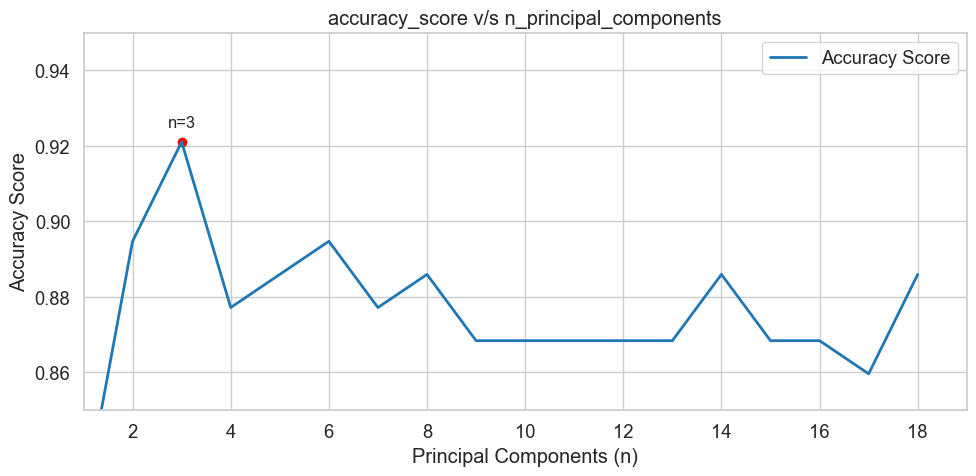

In [43]:
# plotting the graph

plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, 19), y=scores,
             label="Accuracy Score",
             markers=True)
plt.xlim(1, 19)
plt.ylim(0.85, 0.95)
plt.title("accuracy_score v/s n_principal_components")
plt.xlabel("Principal Components (n)")
plt.ylabel("Accuracy Score")

max_score = max(scores)
max_index = scores.index(max_score) + 1
plt.scatter(max_index, max_score, color='red')
plt.text(max_index, max_score + 0.003, f'n={max_index}',
         horizontalalignment='center',
         verticalalignment='bottom',
         fontsize=12)
plt.tight_layout()
plt.show()


>**Optimal value for PCA n_components: 3**


In [46]:
pca = PCA(n_components=3)
pca.fit(x_train_least)
x_train_pca = pca.transform(x_train_least)        
x_test_pca = pca.transform(x_test_least)
explained_variance_ratio = pca.explained_variance_ratio_.round(3)
print(f'{explained_variance_ratio = }')

explained_variance_ratio = array([1.   , 0.381, 0.117])


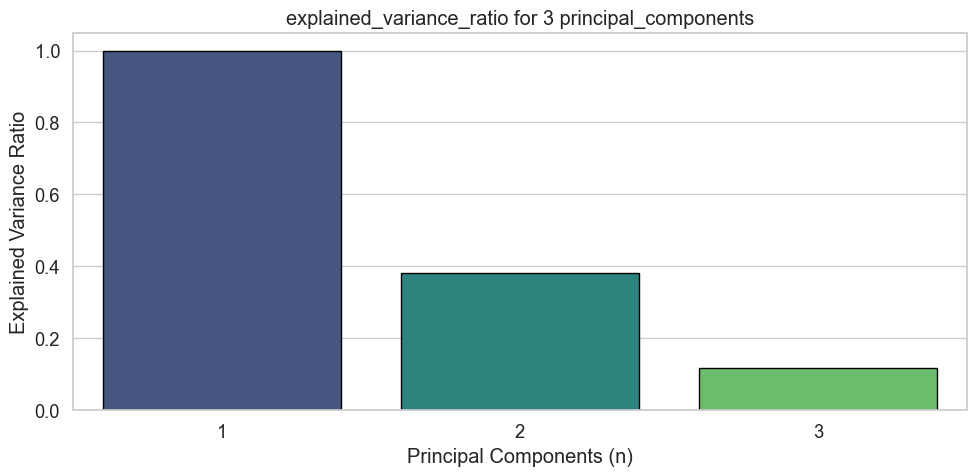

In [45]:
# visualize the explained variance ratio
plt.figure(figsize=(10, 5))
sns.barplot(x=range(1, 4), y=explained_variance_ratio,
            label="Explained Variance Ratio",
            edgecolor="black",
            palette="viridis")
plt.title("explained_variance_ratio for 3 principal_components")
plt.xlabel("Principal Components (n)")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.show()

In [50]:
# how well the principal components classify the training data

fig = px.scatter_3d(x=x_train_pca[:, 0], 
                    y=x_train_pca[:, 1],
                    z=x_train_pca[:, 2],
                    color=y_train, color_discrete_map={0: 'blue', 1: 'red'},
                    labels={'x': 'principal_component_1',
                            'y': 'principal_component_2',
                            'z': 'principal_component_3', 
                            'color': 'Diagnosis'},
                    title="n=3 principal components")
fig.show()

In [32]:
# compiling the pca features to x_train,x_test important features

n_dim_x_train = np.concatenate((x_train,x_train_pca),axis=1)
n_dim_x_test = np.concatenate((x_test,x_test_pca),axis=1)

print(f"{n_dim_x_train.shape = }")
print(f"{n_dim_x_test.shape = }")

n_dim_x_train.shape = (455, 15)
n_dim_x_test.shape = (114, 15)


In [39]:
# storing the updated data

processed_dir = r"D:\Pragyan\Machine Learning Cancer prediction\breast-cancer-prediction\data\processed"
os.makedirs(processed_dir,exist_ok=True)

def save_data(filename,data):
    filepath = os.path.join(processed_dir, filename)
    with open(filepath, 'wb') as f:
        pickle.dump(data, f)

save_data('n_dim_training.pkl',[n_dim_x_train,y_train])
save_data('n_dim_testing.pkl',[n_dim_x_test,y_test])